<a href="https://colab.research.google.com/github/sun-in-universe/blue_dot/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B5%AC%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 구조

## 퍼셉트론

- 인공신경망의 한 종류
- 다수의 입력($x_1, x_2, ..., x_n$)과 가중치($w_1, w_2, ..., w_n$)를 곱하여 그 값에 편향($bias$)을 더한 값이 어느 임계치 값($\theta$)을 초과하면 활성화 함수를 통과한 출력값을 내보냄
![perceptron](https://miro.medium.com/max/1400/1*ofVdu6L3BDbHyt1Ro8w07Q.png)
<br /><sub>출처: https://towardsdatascience.com/rosenblatts-perceptron-the-very-first-neural-network-37a3ec09038a</sub>

## 뉴런의 수학적 표현

![](https://cs231n.github.io/assets/nn1/neuron_model.jpeg)
<br /><sub>출처: https://cs231n.github.io/convolutional-networks/</sub>

$\qquad y = f(\sum_{i} w_ix_i + b) \quad $

  - $f\ $ : 활성화 함수
    - 임계값($\theta$)을 경계로 출력이 바뀜

  - $b\ \ $ :  편향
    - <u>결정 경계선을 원점에서부터 벗어나게 해줌</u>
    - 따로 표현이 없어도 기본적으로 존재한다고 생각

  - $\sum_{i} w_ix_i$ :$\quad $두 벡터의 내적으로 표현 가능
     
     $\\ \quad x_1w_1 + x_2w_2 +\ ... \ + x_nw_n = w^Tx$


## 완전 연결 계층(Fully-Connected Layer) 수학적 표현

![](https://miro.medium.com/max/620/1*ZBYO3waYUyPsLm0rb15sEQ.png)
<br /><sub>출처: https://towardsdatascience.com/the-sparse-future-of-deep-learning-bce05e8e094a</sub>

  $\qquad  W = [w_0, w_1,\ ..., \ w_{M-1}]^T $  
  $\qquad $  각각의 $w_k$는 $N\times 1$ 형태의 벡터  
  $\qquad W$는 $N \times M$ 행렬

  $ \qquad b$ = $[b_0, b_1, \ ..., \ b_{M-1}]$  

  $\qquad y_0 = f(w_0^Tx + b_0)$  

  $\qquad y_1 = f(w_1^Tx + b_1)$  

  $\qquad y_2 = f(w_2^Tx + b_2)$  
  
  $\qquad \quad ...$

  $\qquad y_{M-1} = f(w_{M-1}^Tx + b_{M-1})$  

  $\quad  \rightarrow y = f(Wx + b)$

## 논리회로
  * 논리 게이트(Logic Gates)
    - AND
    - OR
    - NOT
    - NAND
    - NOR  

* 다이어그램과 진리표

![](http://www.schoolphysics.co.uk/age14-16/Electronics/text/Logic_gates/images/1.png)
<br /><sub>출처: http://www.schoolphysics.co.uk/age14-16/Electronics/text/Logic_gates/index.html</sub>

### AND 게이트

- 두 입력이 모두 1일 때 1을 출력하는 논리회로   

![](https://www.tutorialspoint.com/computer_logical_organization/images/and_logic.jpg)

- 진리표

![](https://www.tutorialspoint.com/computer_logical_organization/images/and_truthtable.jpg)
<br /><sub>출처: https://www.tutorialspoint.com/computer_logical_organization/logic_gates.htm</sub>

- AND 게이트를 만족시키는 가중치와 편향 구하기


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

<ipython-input-1-74e69c5ee709>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [ ]:
def AND(a, b):
  input = np.array([a, b])
  weights = np.array([0.4, 0.4])
  bias = -0.6
  value = np.sum(input * weights) + bias

  if value <= 0:
    return 0
  else:
    return 1

In [ ]:
print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


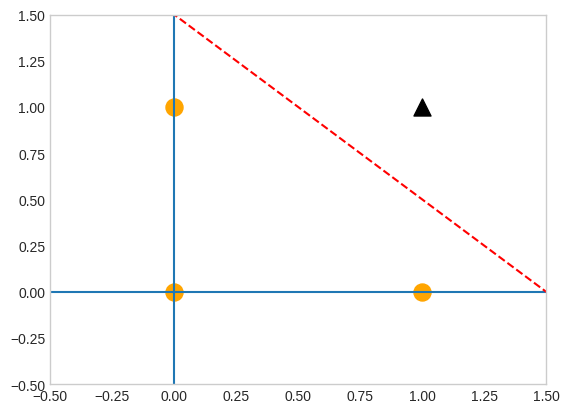

In [ ]:
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)

bias = -0.6

y = (-0.4 * x1 - bias) / 0.4

plt.axvline(x=0)
plt.axhline(y=0)

plt.plot(x1, y, 'r--')
plt.scatter(0, 0, color='orange', marker='o', s=150)
plt.scatter(0, 1, color='orange', marker='o', s=150)
plt.scatter(1, 0, color='orange', marker='o', s=150)
plt.scatter(1, 1, color='black', marker='^', s=150)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()


### OR 게이트

- 두 입력 중 하나라도 1이면 1을 출력하는 논리회로  
  
![](https://www.tutorialspoint.com/computer_logical_organization/images/or_logic.jpg)

- 진리표  

![](https://www.tutorialspoint.com/computer_logical_organization/images/or_truthtable.jpg)
<br /><sub>출처: https://www.tutorialspoint.com/computer_logical_organization/logic_gates.htm</sub>

- OR 게이트를 만족시키는 가중치와 편향 구하기


In [ ]:
def OR(a, b):
  input = np.array([a, b])
  weights = np.array([0.4, 0.5])
  bias = -0.3
  value = np.sum(input*weights) + bias

  if value <= 0:
    return 0
  else:
    return 1

In [ ]:
print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


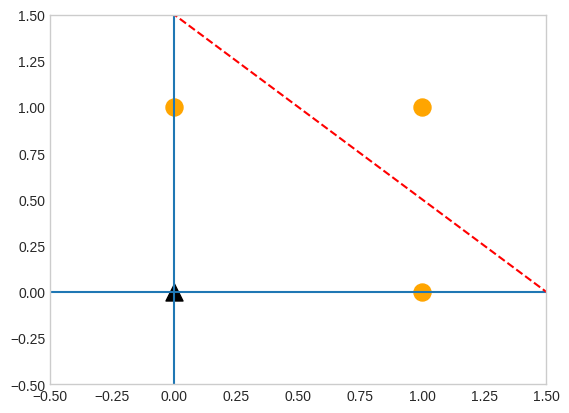

In [ ]:
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)

bias = -0.6

y = (-0.4 * x1 - bias) / 0.4

plt.axvline(x=0)
plt.axhline(y=0)

plt.plot(x1, y, 'r--')
plt.scatter(0, 0, color='black', marker='^', s=150)
plt.scatter(0, 1, color='orange', marker='o', s=150)
plt.scatter(1, 0, color='orange', marker='o', s=150)
plt.scatter(1, 1, color='orange', marker='o', s=150)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()

### NAND 게이트


- 두 입력이 모두 1일 때 0을 출력하는 논리회로

![](https://www.tutorialspoint.com/computer_logical_organization/images/nand_logic.jpg)

- 진리표  

![](https://www.tutorialspoint.com/computer_logical_organization/images/nand_truthtable.jpg)
<br /><sub>출처: https://www.tutorialspoint.com/computer_logical_organization/logic_gates.htm</sub>

- NAND 게이트를 만족시키는 가중치와 편향 구하기



In [ ]:
def NAND(a, b):
  input = np.array([a, b])
  weights = np.array([-0.6, -0.5])
  bias = 0.7
  value = np.sum(input * weights) + bias

  if value <= 0:
    return 0
  else:
    return 1

In [ ]:
print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


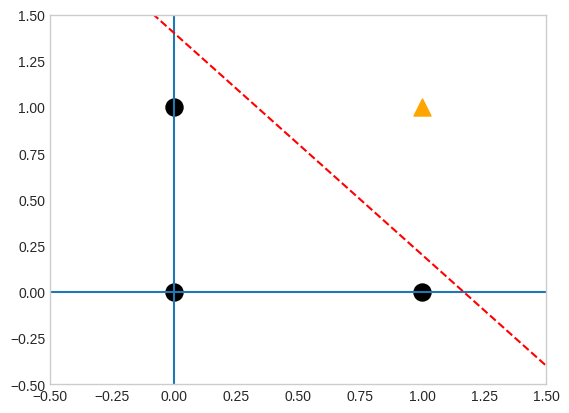

In [ ]:
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)

bias = 0.7

y = (0.6 * x1 - bias) / -0.5

plt.axvline(x=0)
plt.axhline(y=0)

plt.plot(x1, y, 'r--')
plt.scatter(0, 0, color='black', marker='o', s=150)
plt.scatter(0, 1, color='black', marker='o', s=150)
plt.scatter(1, 0, color='black', marker='o', s=150)
plt.scatter(1, 1, color='orange', marker='^', s=150)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()

### XOR 게이트

- 인공지능 첫번째 겨울
- 딥러닝의 첫번째 위기를 초래
  - 마빈 민스키와 세이무어 페퍼트에 의해 문제 제기
  - AND, NAND와 같은 선형문제는 퍼셉트론으로 해결 가능, 하지만 XOR은 어떻게? 직선(선형) 하나로는 불가능!

![](http://ecee.colorado.edu/~ecen4831/lectures/xor2.gif)
<br /><sub>출처: http://ecee.colorado.edu/~ecen4831/lectures/NNet3.html</sub>

- **다층 퍼셉트론**으로 해결
  - 비선형 문제를 해결할 수 있다!

- AND, NAND, OR Gate를 조합

## 다층 퍼셉트론(Multi Layer Perceptron, MLP)  

![](https://upload.wikimedia.org/wikipedia/commons/c/c2/MultiLayerNeuralNetworkBigger_english.png)
<br /><sub>출처: https://commons.wikimedia.org/wiki/File:MultiLayerNeuralNetworkBigger_english.png</sub>


### 다층 퍼셉트론의 구성

  - 입력층(input layer)
  - 은닉층(hidden layer)
    - 1개 이상 존재
    - 보통 5개 이상 존재하면 Deep Neural Network라고 칭함
  - 출력층(output layer)  

![](https://www.researchgate.net/profile/Sandip_Lahiri/publication/26614896/figure/fig1/AS:310007494135809@1450922954279/A-schematic-diagram-of-artificial-neural-network-and-architecture-of-the-feed-forward.png)
<br /><sub>출처: https://www.researchgate.net/figure/A-schematic-diagram-of-artificial-neural-network-and-architecture-of-the-feed-forward_fig1_26614896</sub>

  - 수식

    - (input layer $\rightarrow$ hidden layer)   
  $ \quad z = f_L(W_Lx + b_L) $  

    - (hidden layer $\rightarrow$ output layer)   
  $ \quad y = a_K(W_Kz + b_K) $  

### XOR 게이트
- 서로 다른 두 값이 입력으로 들어가면 1을 반환

- 진리표  

![](https://www.tutorialspoint.com/computer_logical_organization/images/xor_truthtable.jpg)
<br /><sub>출처: https://www.tutorialspoint.com/computer_logical_organization/logic_gates.htm</sub>


In [ ]:
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y

In [ ]:
print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


## 활성화 함수(Activation Function)

- 입력 신호의 총합을 출력 신호로 변환하는 함수
- 활성화 함수에 따라 출력값이 결정
- 단층, 다층 퍼셉트론 모두 사용
- 대표적인 활성화 함수
  - Sigmoid
  - ReLU
  - tanh
  - Identity Function
  - Softmax

-  하나의 layer에서 다음 layer로 넘어갈 때는 항상 활성화 함수를 통과
    
- [참고] 여러가지 활성화 함수  
 https://en.wikipedia.org/wiki/Activation_function  





### Step Function(계단 함수)

### $\quad y = \begin{cases}
0 \quad (x < 0) \\
1 \quad (x \ge 0)
\end{cases} $   

![](https://www.intmath.com/laplace-transformation/svg/svgphp-unit-step-functions-definition-1a-s1.svg)
<br /><sub>출처: https://www.intmath.com/laplace-transformation/1a-unit-step-functions-definition.php</sub>
  



In [ ]:
def step_function(x):
  if x >0:
    return 1
  else:
    return 0

In [ ]:
def step_function_for_numpy(x):
  y = x > 0
  return y.astype(np.int)

In [ ]:
print(step_function(-3))
print(step_function(5))

a = np.array([5, 3, -4, 2.0])
print(step_function_for_numpy(a))

0
1
[1 1 0 1]


<ipython-input-14-c6f1f746bcbe>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)



### Sigmoid Function(시그모이드 함수)
- 이진분류(binary classification)에 주로 사용
  - 마지막 출력층의 활성화 함수로 사용
- 출력값이 0~1 의 값이며, 이는 **확률**로 표현 가능


$\quad y = \frac{1}{1 + e^{-x}}$

![](https://media.geeksforgeeks.org/wp-content/uploads/20190911181329/Screenshot-2019-09-11-18.05.46.png)
<br /><sub>출처: https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/</sub>



In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
print(sigmoid(3))
print(sigmoid(-3))

0.9525741268224334
0.04742587317756678


### 시그모이드 함수와 계단 함수 비교

- 공통점
  - 출력값이 0~1 내의 범위
  - 입력값의 정도에 따라 출력값의 정도가 달라짐
    즉, 입력이 중요하면(입력값이 크면) 큰 값을 출력
    
- 차이점  
 계단함수에 비해 시그모이드 함수는
  - 입력에 따라 출력이 연속적으로 변화
  - 출력이 '매끄러움'  
    이는 모든 점에서 **미분 가능**함을 의미


<ipython-input-14-c6f1f746bcbe>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


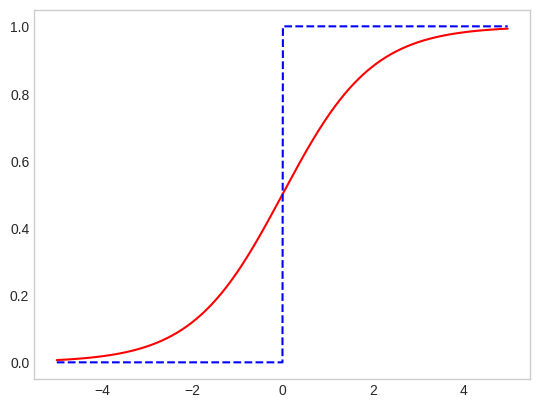

In [ ]:
plt.grid()
x = np.arange(-5.0, 5.0, 0.01)
y1 = sigmoid(x)
y2 = step_function_for_numpy(x)
plt.plot(x, y1, 'r-', x, y2, 'b--')
plt.show()


### ReLU(Rectified Linear Unit)

- 가장 많이 쓰이는 함수 중 하나  
  
  ### $ y = \begin{cases}
0 \quad (x \le 0) \\
x \quad (x > 0)
\end{cases} $

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png)
<br /><sub>출처: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/</sub>


In [ ]:
def ReLU(x):
  if x > 0:
    return x
  else:
    return 0

In [ ]:
print(ReLU(5))
print(ReLU(-4))

5
0



### 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function, tanh)

 ### $ \quad y = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

![](https://ww.namu.la/s/aeff20070260dc095f50d1ec74f1d4dd96bab65016ab1b01bed2145850e165e7c713734ff60047392c522e784bec9605782e4cacb2606725d782714917e2a47456d4c4a308c4b4bcc7f9a905b357556b912b404573385c42ba30e41a627dd31a)
<br /><sub>출처: https://namu.wiki/w/%EC%8C%8D%EA%B3%A1%EC%84%A0%20%ED%95%A8%EC%88%98</sub>



In [ ]:
def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [ ]:
print(tanh(3))
print(tanh(-3))

0.9950547536867306
-0.9950547536867306


### Identity Function(항등 함수)
- 회귀(Regression) 문제에서 주로 사용  
  - 출력층의 활성화 함수로 활용

- $y=x$

- 입력값 그대로 출력하기 때문에 굳이 정의할 필요는 없지만  
  신경망 중간 레이어 흐름과 통일하기 위해 사용

![](https://math.info/image/394/identity_function.jpg)
<br /><sub>출처: https://math.info/Algebra/Identity_Function/</sub>


In [ ]:
def identify_function(x):
  return x

In [ ]:
print(identify_function(4))
print(identify_function(-1))

X = np.array([2, -3, 0.4])
print(identify_function(X))

4
-1
[ 2.  -3.   0.4]


### Softmax

- 다중 클래스 분류에 사용(Multi Class Classification)
- 입력값의 영향을 크게 받음  
  입력값이 크면 출력값도 큼
- 출력값을 확률에 대응가능
- 출력값의 **총합은 1**

- 수식  
 ### $ y_k = \frac{exp(a_k)}{\sum_{i=1}{exp(a_i)}}$

![](https://miro.medium.com/max/1400/1*670CdxchunD-yAuUWdI7Bw.png)
<br /><sub>출처: https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d</sub>

In [ ]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [ ]:
a = np.array([0.3, 0.2, 4.0, -1.2])
print(softmax(a))
print(np.sum(softmax(a)))

[0.02348781 0.02125265 0.9500187  0.00524084]
1.0


#### 소프트맥스 함수 주의점
- 오버플로우(overflow) 문제
- 지수함수(exponential function)을 사용하기 때문에  
  입력값이 너무 크면 무한대(inf)가 반환됨

- 개선한 수식
 ## $y_k = \frac{exp(a_k)}{\sum_{i=1}{exp(a_i)}} = \frac{Cexp(a_k)}{C\sum_{i=1}{exp(a_i)}} \\
  \quad = \frac{exp(a_k + logC)}{\sum_{i=1}{exp(a_i + logC)}} \\
  \quad = \frac{exp(a_k + C')}{\sum_{i=1}{exp(a_i + C')}}
  $

In [ ]:
A = np.array([10000, 9000, 10050, 500])
print(softmax(A))

[nan nan nan  0.]


<ipython-input-25-02f7ab8698be>:2: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
<ipython-input-25-02f7ab8698be>:4: RuntimeWarning: invalid value encountered in true_divide
  y = exp_a / sum_exp_a


In [ ]:
def softmax(a):
    C = np.max(a)
    return (np.exp(a - C) / np.sum(np.sum(a - C)))

In [ ]:
A = np.array([10000, 9000, 10050, 500])
print(softmax(A))

[-1.81103272e-26 -0.00000000e+00 -9.38967136e-05 -0.00000000e+00]


### 활성화 함수를 비선형 함수(non-linear function)로 사용하는 이유
- 신경망을 깊게(deep) 하기 위함
- 만약 활성화 함수를 선형함수(linear function)으로 하게 되면 은닉층의 갯수가 여러개이더라도 의미가 없어짐
- 만약,$\ h(x) = cx이고, 3개의 은닉층이 존재한다면
\\  
y = h(h(h(x)))  \\
\ \ = c*c*c*x \\
\ \ = c^3x \\ $  
이므로 결국에는 선형함수가 되어버림


### 그 외의 활성화 함수
- LeakyReLU

### $ \ \ f_a(x) = \begin{cases}
x \quad (x \ge 0) \\
ax \quad (x < 0)
\end{cases}$

![](https://i0.wp.com/knowhowspot.com/wp-content/uploads/2019/04/IMG_20190406_220045-1.jpg)
<br /><sub>출처: https://knowhowspot.com/technology/ai-and-machine-learning/artificial-neural-network-activation-function/</sub>

In [ ]:
def LeakyReLU(x):
  a = 0.01
  return np.maximum(a*x, x)

In [ ]:
x = np.array([0.5, -1.4, 3, 0, 5])
print(LeakyReLU(x))

[ 0.5   -0.014  3.     0.     5.   ]


- ELU(Exponential Linear Units)  

  $ f(\alpha, x) = \begin{cases}
\alpha \ (e^x - 1) \quad (x \le 0) \\
x \qquad \qquad (x > 0)
\end{cases}$  

![](https://www.researchgate.net/publication/331794632/figure/fig1/AS:736888264609792@1552699261431/Exponential-Linear-Unit-activation-function-input-output-mapping-The-activation-function.jpg)
<br /><sub>출처: https://www.researchgate.net/figure/Exponential-Linear-Unit-activation-function-input-output-mapping-The-activation-function_fig1_331794632</sub>

In [ ]:
def ELU(x):
  alpha = 1.0
  return (x > 0) * x + (x <= 0) * alpha * (np.exp(x) - 1)

In [ ]:
print(ELU(4))
print(ELU(-0.5))

x = np.array([-2, 0.1, 4])
print(ELU(x))

4.0
-0.3934693402873666
[-0.86466472  0.1         4.        ]


### 활성화 함수 참고

- 일반적인 사용 순서
  1. ELU
  2. LeakyReLU
  3. ReLU
  4. tanh
  5. sigmoid 순으로 사용

- 스탠포드 강의에서 언급한 사용 순서
  1. ReLU
  2. ReLU Family(LeakyReLU, ELU)
  3. sigmoid는 사용 X  
  

## 3층 신경망 구현하기

![](http://ufldl.stanford.edu/tutorial/images/Network3322.png)
<br /><sub>출처: http://deeplearning.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/</sub>


- 2클래스 분류
- 입력층(Input Layer)
  - 뉴런수: 3

- 은닉층(Hidden Layers)
  - 첫번째 은닉층
    - 뉴런수: 3
  - 두번째 은닉층
    - 뉴런수: 2
- 출력층(Output Layer)
  - 뉴런수: 2  


### 활성화 함수 정의

In [ ]:
def sigmoid(X):
  return 1 / (1 + np.exp(-X))

### 레이어 정의

In [ ]:
X = np.array([11.0, 0.5, 0.4])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6], [0.3, 0.5, 0.7]])
B1 = np.array([1, 1, 1])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

(3, 3)
(3,)
(3,)
[2.32 4.7  7.08]
[0.91051994 0.9909867  0.99915893]


In [ ]:
W2 = np.array([[0.2, 0.4, 0.6], [0.1, 0.3, 0.5], [0.4, 0.6, 0.8]])
B2 = np.array([1, 1, 1])

print(W2.shape)
print(B2.shape)

A2 = np.dot(A1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

(3, 3)
(3,)
[ 4.766  7.586 10.406]
[0.99155751 0.99949275 0.99996975]


In [ ]:
W3 = np.array([[0.1, 0.3], [0.1, -0.5], [0.3, 0.5]])
B3 = np.array([1, 1])

print(W3.shape)
print(B3.shape)

A3 = np.dot(A2, W3) + B3
Z3 = sigmoid(A3)

print(A3)
print(Z3)

(3, 2)
(2,)
[5.357  3.8398]
[0.9953071  0.97895453]


In [ ]:
W4 = np.array([[0.1, 0.2], [0.3, 0.5]])
B4 = np.array([1, 1])

print(W4.shape)
print(B4.shape)

A4 = np.dot(A3, W4) + B4
Y = sigmoid(A4)

print(A4)
print(Y)

(2, 2)
(2,)
[2.68764 3.9913 ]
[0.93629336 0.98185948]


In [ ]:
def network():

  network = {}

 #첫번째 레이어
  network["W1:"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6], [0.3, 0.5, 0.7]])
  network['B1'] = np.array([1, 1, 1])

  #두번째 레이어
  network["W2:"] = np.array([[0.2, 0.4, 0.6], [0.1, 0.3, 0.5], [0.4, 0.6, 0.8]])
  network['B2'] = np.array([1, 1, 1])

  #세번째 레이어
  network["W3:"] = np.array([[0.1, 0.3], [0.1, -0.5], [0.3, 0.5]])
  network["B3"] = np.array([1, 1])

  #네번째 레이어
  network["W4:"] = np.array([[0.1, 0.2], [0.3, 0.5]])
  network["B4"] = np.array([1, 1])

  return network

def forward(network, x):
  W1, W2, W3, W4 = network["W1:"], network["W2:"], network["W3:"], network["W4:"]
  B1, B2, B3, B4 = network['B1'], network['B2'], network['B3'], network['B4']

  A1 = np.dot(x, W1) + B1
  Z1 = sigmoid(A1)

  A2 = np.dot(Z1, W2) + B2
  Z2 = sigmoid(A2)

  A3 = np.dot(Z2, W3) + B3
  Z3 = sigmoid(A3)

  A4 = np.dot(Z3, W4) + B4
  y = sigmoid(A4)

  return y

net = network()
x = np.array([0.3, 1.3, -2.2])
y = forward(net, x)
print(y)

[0.78828096 0.82509459]


In [ ]:
def network():

  network = {}

 #첫번째 레이어
  network["W1:"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6], [0.3, 0.5, 0.7]])
  network['B1'] = np.array([1, 1, 1])

  #두번째 레이어
  network["W2:"] = np.array([[0.2, 0.4, 0.6], [0.1, 0.3, 0.5], [0.4, 0.6, 0.8]])
  network['B2'] = np.array([1, 1, 1])

  #세번째 레이어
  network["W3:"] = np.array([[0.1, 0.3], [0.1, -0.5], [0.3, 0.5]])
  network["B3"] = np.array([1, 1])

  #네번째 레이어
  network["W4:"] = np.array([[0.1, 0.2], [0.3, 0.5]])
  network["B4"] = np.array([1, 1])

  return network

In [ ]:
def forward(network, x):
  W1, W2, W3, W4 = network["W1:"], network["W2:"], network["W3:"], network["W4:"]
  B1, B2, B3, B4 = network['B1'], network['B2'], network['B3'], network['B4']

  A1 = np.dot(x, W1) + B1
  Z1 = sigmoid(A1)

  A2 = np.dot(Z1, W2) + B2
  Z2 = sigmoid(A2)

  A3 = np.dot(Z2, W3) + B3
  Z3 = sigmoid(A3)

  A4 = np.dot(Z3, W4) + B4
  y = sigmoid(A4)

  return y

### 신경망 추론 실행

In [ ]:
net = network()
x = np.array([0.3, 1.3, -2.2])
y = forward(net, x)
print(y)

[0.78828096 0.82509459]
